In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\\customer_booking.csv",encoding=('ISO-8859-1'))

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [13]:
week_end=[]
for day in df["flight_day"]:
    if day==6 or day==7:
        week_end.append(1)
    else:
        week_end.append(0)

df['is_weekend'] = week_end
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


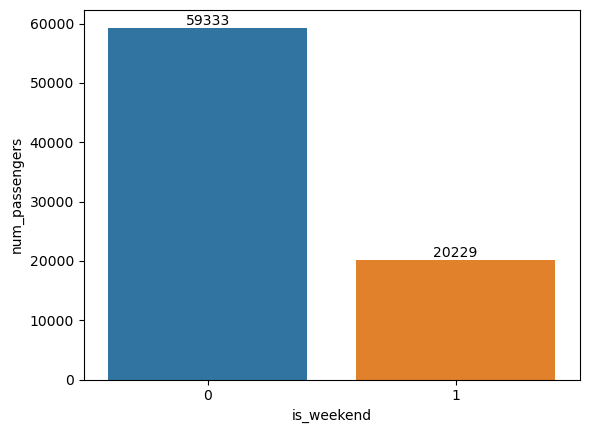

In [14]:
weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x= 'is_weekend', y= 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

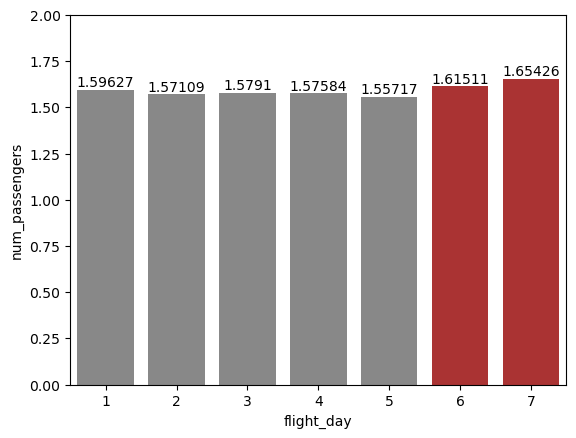

In [15]:
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

ax = sns.barplot(data = dayperday, x= 'flight_day', y= 'num_passengers')
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
ax.bar_label(ax.containers[0])
plt.ylim(0,2)
ax.patches[5].set_facecolor('#aa3333')
ax.patches[6].set_facecolor('#aa3333')
plt.show()

In [16]:
df['flight_day'].value_counts().reset_index().sort_values('flight_day')

,flight_day,count
0,1,8102
2,2,7673
1,3,7674
3,4,7424
4,5,6761
6,6,5812
5,7,6554


In [17]:
route=df[df['is_weekend']==1].groupby('route').agg({"num_passengers":'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

In [18]:
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


In [19]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [20]:
df.drop('route',axis=1,inplace=True)

In [21]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [22]:
import pycountry_convert as pc

continent = []


def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        return continent_name
    except:
        return 'Others'


df['booking_continent'] = df['booking_origin'].apply(get_continent)

In [23]:
df['booking_continent'].value_counts()

booking_continent
AS        29689
OC        18960
EU          578
NA          525
Others      138
AF           69
SA           41
Name: count, dtype: int64

In [24]:
df.drop('booking_origin',axis=1, inplace=True)

In [25]:
df.sample()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
21888,1,Internet,RoundTrip,75,23,12,1,0,0,1,8.83,0,0,OC


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


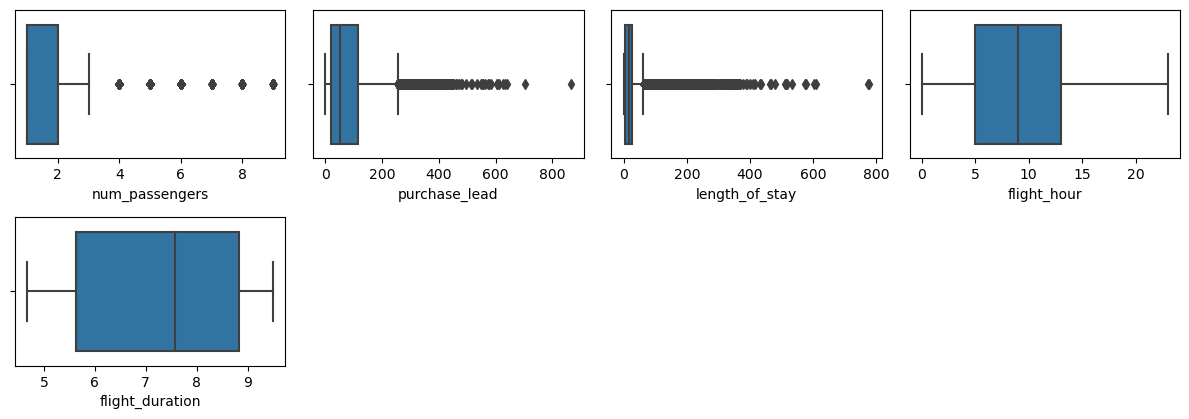

In [26]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

In [27]:
from scipy import stats

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]
    
print(f'Total rows after delete outlier : {len(df)}')

Total rows before delete outlier : 50000
Total rows after delete outlier : 47115


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1415647880.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1415647880.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1415647880.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1415647880.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1687144970.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1687144970.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1687144970.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\1687144970.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


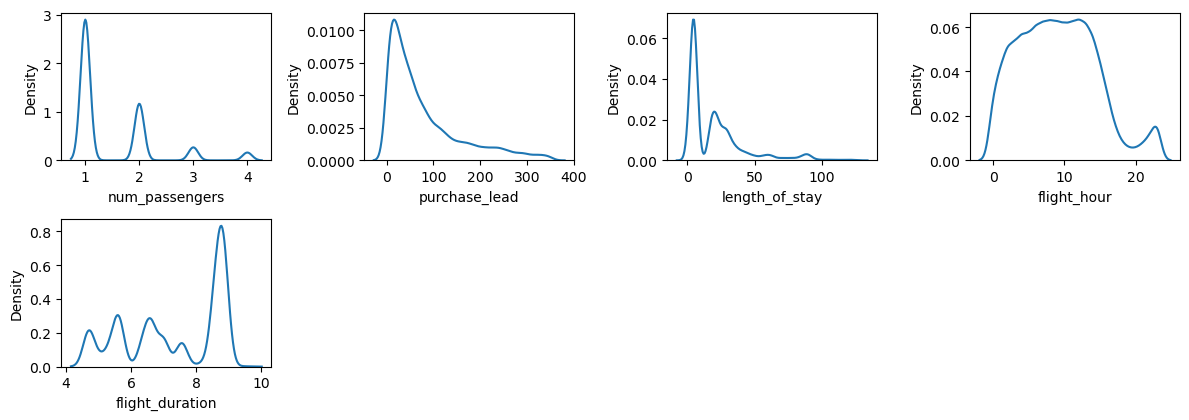

In [28]:
plt.figure(figsize=(12,8))
for i,column in enumerate (df[num].columns,1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num],x=df[column])
    plt.tight_layout()

In [29]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
0,0.333333,0.742210,0.150794,0.304348,0.175983
1,0.000000,0.317280,0.158730,0.130435,0.175983
2,0.333333,0.688385,0.174603,0.739130,0.175983
3,0.000000,0.271955,0.246032,0.173913,0.175983
4,0.333333,0.192635,0.174603,0.652174,0.175983


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\476571690.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\476571690.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\476571690.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6120\476571690.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


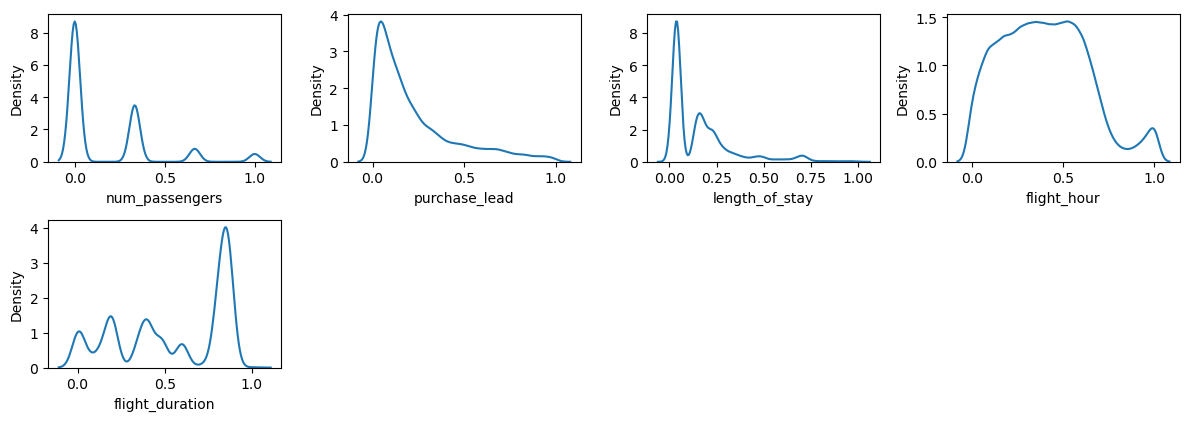

In [30]:
df[num] = num_features

plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df, x=df[column])
    plt.tight_layout()

In [31]:
from sklearn import preprocessing
df1=df.copy()
label_encode = ['sales_channel']
one_hot = ['booking_continent']
                
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

df1['trip_type'] = df1['trip_type'].map(mapping_trip_type)

df1['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df1['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent',dtype=int,drop_first=True)
df1 = df1.join(onehots)

df1.drop('booking_continent', axis=1, inplace=True)

In [32]:
df1.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.74221,0.150794,0.304348,6,1,0,0,0.175983,0,1,0,0,0,1,0,0
1,0.000000,0,0,0.31728,0.158730,0.130435,6,0,0,0,0.175983,0,1,0,0,0,1,0,0


In [33]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns=['booking_complete'], axis=1)
y = df1['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
y_train.value_counts(normalize=True)

booking_complete
0    0.851136
1    0.148864
Name: proportion, dtype: float64

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming you have your feature and target variables: x_train and y_train

# Random Oversampling
ros = RandomOverSampler(random_state=42)
x_over, y_over = ros.fit_resample(x_train, y_train)

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x_train, y_train)

# Check the class distribution after resampling
print("Class distribution after random oversampling:", Counter(y_over))
print("Class distribution after random undersampling:", Counter(y_under))

Class distribution after random oversampling: Counter({0: 32081, 1: 32081})
Class distribution after random undersampling: Counter({0: 5611, 1: 5611})


In [37]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

Accuracy (Test Set): 0.85
Precision (Test Set): 0.42
Recall (Test Set): 0.05
F1-Score (Test Set): 0.09
roc_auc (test-proba): 0.52
roc_auc (train-proba): 0.57


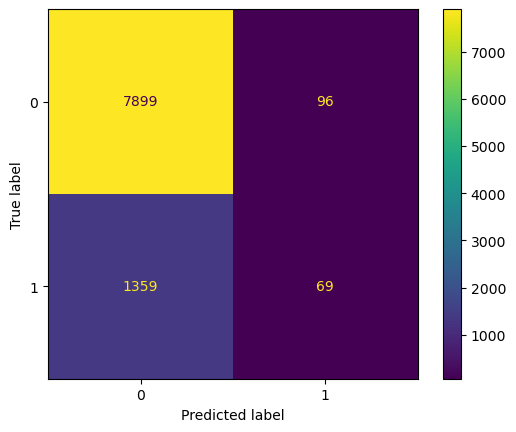

In [40]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
confusionmatrix(predictions)
eval_classification(clf)

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_over, y_over)


eval_classification(xg_tuned)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.28
Recall (Test Set): 0.28
F1-Score (Test Set): 0.28
roc_auc (test-proba): 0.58
roc_auc (train-proba): 1.00


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7995
           1       0.28      0.28      0.28      1428

    accuracy                           0.78      9423
   macro avg       0.58      0.58      0.58      9423
weighted avg       0.78      0.78      0.78      9423



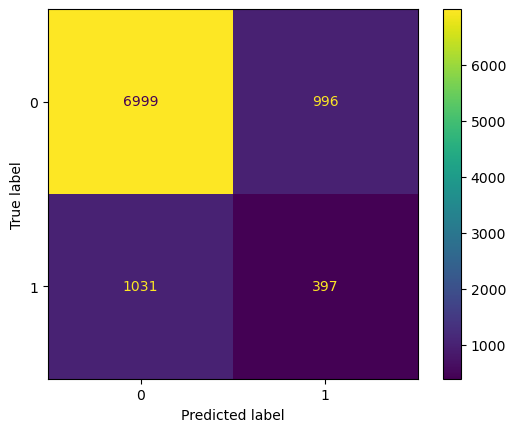

In [44]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)
print(classification_report(y_test, predictions))

<Axes: >

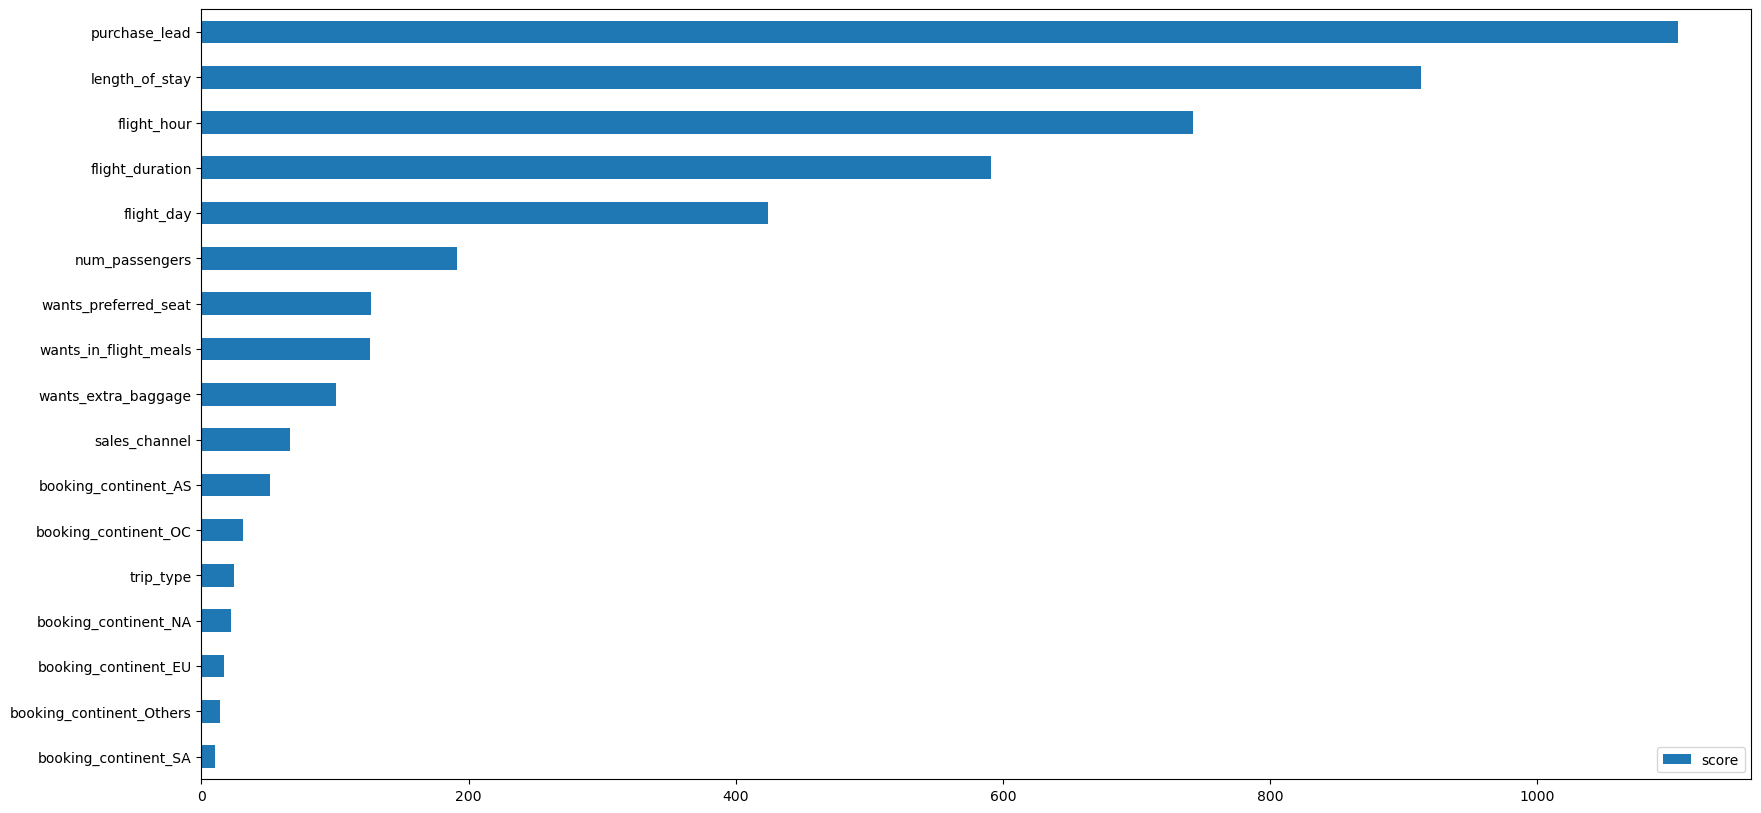

In [45]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (20,10)) 